# SALES PREDICTION USING PYTHON

### IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.simplefilter("ignore")

### READING DATASET

In [2]:
dataset=pd.read_csv(r"C:\Users\reddy\OneDrive\Desktop\oasis\Advertising.csv")

In [3]:
dataset

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [4]:
dataset.shape

(200, 5)

In [5]:
dataset.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [6]:
dataset.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [8]:
dataset.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


### CHECKING NULL VALUES

In [9]:
dataset.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

### DROPING COLUMNS

In [10]:
dataset.drop(columns=['Unnamed: 0'],inplace=True)

In [11]:
dataset

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [12]:
dataset.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


### VISUALIZATION

<AxesSubplot:>

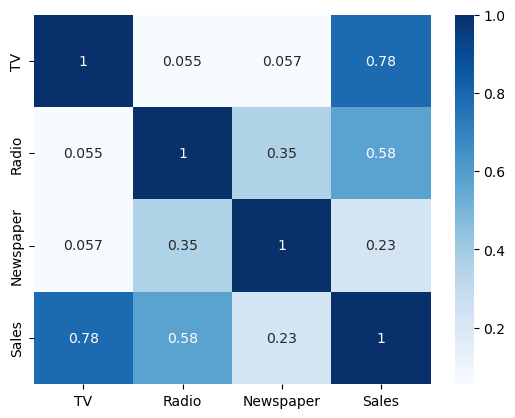

In [13]:
sns.heatmap(data=dataset.corr(),annot=True,cmap='Blues')

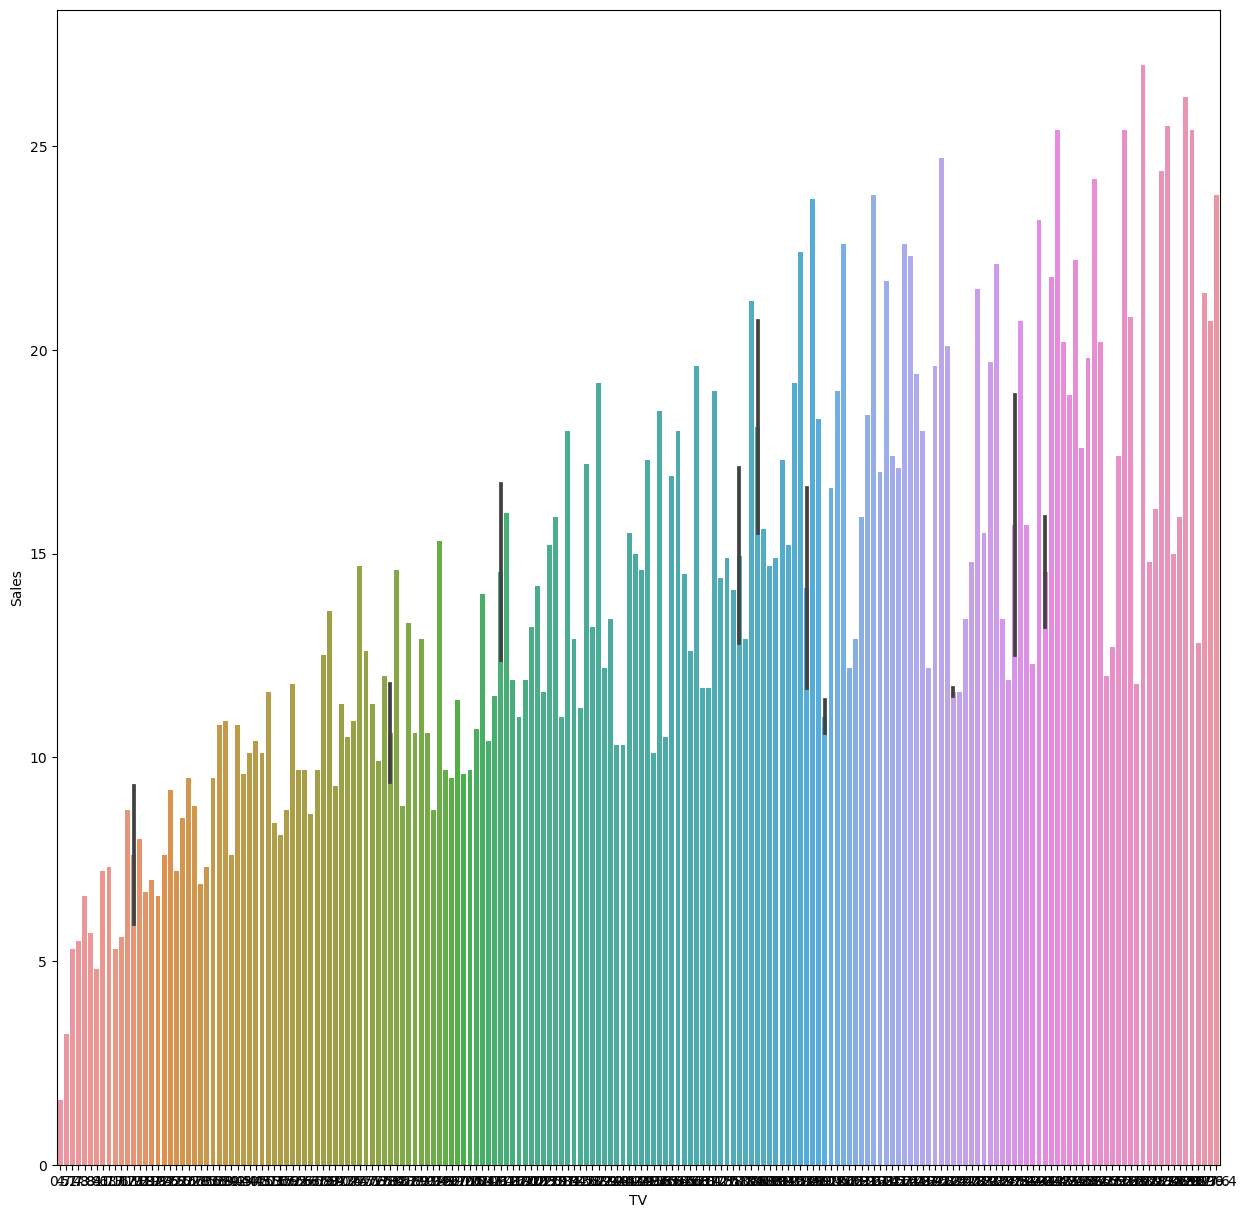

In [14]:
plt.figure(figsize=(15,15))
ax=sns.barplot(x=dataset['TV'],y=dataset['Sales'])

### SPLITING DATASET

In [15]:
x=dataset.drop(columns=['Sales'])

In [16]:
y=dataset['Sales']

In [17]:
x

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [18]:
print(x.shape)

(200, 3)


In [19]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [20]:
print(y.shape)

(200,)


In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [23]:
x_train

,TV,Radio,Newspaper
181,218.5,5.4,27.4
21,237.4,5.1,23.5
131,265.2,2.9,43.0
29,70.6,16.0,40.8
119,19.4,16.0,22.3
...,...,...,...
26,142.9,29.3,12.6
37,74.7,49.4,45.7
44,25.1,25.7,43.3
4,180.8,10.8,58.4


In [24]:
y_train

181    12.2
21     12.5
131    12.7
29     10.5
119     6.6
       ... 
26     15.0
37     14.7
44      8.5
4      12.9
128    24.7
Name: Sales, Length: 150, dtype: float64

In [25]:
print(x_train.shape)

(150, 3)


In [26]:
print(y_train.shape)

(150,)


### LASSO REGRESSION

In [27]:
from sklearn.linear_model import Lasso

In [28]:
lr=Lasso()

### TRAINING MODEL

In [29]:
lr=lr.fit(x_train,y_train)

### PREDICTING VALUES

In [30]:
y1_pred=lr.predict(x_test)

In [31]:
y1_pred

array([12.65232976, 20.43066583, 19.53814893,  9.57180759, 17.00187233,
       11.64510879, 14.42277899, 16.97223673, 18.02660125, 16.32997494,
        8.51808827, 14.62650657, 15.4474824 , 20.65928291, 15.30259956,
       12.51657817, 17.24035339, 12.14629338, 15.18922605,  7.94970775,
       13.60514584,  4.67031713, 12.30140464, 13.85119434, 23.9649993 ,
        8.9182274 ,  5.47267685, 17.26675568, 10.26763219,  6.67563867,
        5.9051819 , 18.15242685, 13.95094208, 23.6009879 ,  3.80205188,
       11.50615673, 12.40767001, 16.29526881, 15.60857547, 10.53720696,
       17.54409479,  3.91545824,  9.75570153, 10.69150898, 19.08010551,
       16.92823163, 16.90799703, 18.35835976, 17.18743577, 13.60190519])

In [32]:
from sklearn.metrics import r2_score,mean_absolute_error as mae

### R2_SCORE

In [33]:
s1=r2_score(y_test,y1_pred)
print("r2_score:",s1*100)

r2_score: 91.56760715902189


### MEAN ABSOLUTE ERROR

In [34]:
mae(y_test,y1_pred)

1.2462599585130487

### DecisionTreeRegressor

In [35]:
from sklearn.tree import DecisionTreeRegressor

In [36]:
dt=DecisionTreeRegressor()

### TRAINING MODEL

In [37]:
dt=dt.fit(x_train,y_train)

In [38]:
y2_pred=dt.predict(x_test)

In [39]:
y2_pred

array([11.7, 22.6, 23.2, 11.4, 18.3, 11.8, 15. , 15.7, 18.3, 17.1, 10.6,
       12.5, 15.5, 23.2, 13.6, 10.4, 17.1, 12.9, 14.9, 10.7, 11.5,  6.7,
       10.4, 13.4, 24.4,  5.7,  5.7, 17.1, 11.3,  6.7,  7.6, 18.5, 13.4,
       24.4,  6.7,  8.8,  9.2, 17.3, 18.5, 12.4, 15. ,  6.7, 10.4,  5.5,
       19. , 19.2, 19.2, 22.6, 17.1, 12.6])

### R2_SCORE

In [40]:
s2=r2_score(y_test,y2_pred)
print("r2_score:",s2*100)

r2_score: 95.5996498612269


### MEAN ABSOLUTE ERROR

In [41]:
mae(y_test,y2_pred)

0.826

### Lasso VS DesionTreeRegressor

In [42]:
x=['Lasso','DesionTreeRegressor']

In [43]:
y=[s1,s2]

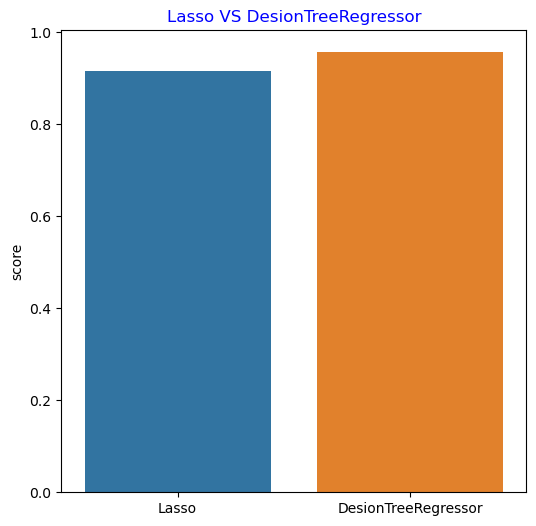

In [44]:
plt.figure(figsize=(6,6))
sns.barplot(x,y)
plt.ylabel("score")
plt.title("Lasso VS DesionTreeRegressor",color="blue")
plt.show()